# Logistic Regression

We will try implementing a Logistic Regression Model on the Wine Dataset from the Sklearn Library by finding the appropriate suitable related parameters in the data.

## Importing dependencies
Importing dependencies like numpy, pandas, sklearn, matplotlib that we are going to use in the future

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading our dataset
We load the Wine dataset and print it's description to see about what the DataFrame object is.

In [2]:
dataSrc = load_wine()
print(dataSrc.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Converting dataset to DataFrame Object
We load our Wine dataset into a Pandas DataFrame object.

In [0]:
data = pd.DataFrame(data= np.c_[dataSrc['data'], dataSrc['target']], columns= dataSrc['feature_names'] + ['target'])

## Describing our dataset
We display the first 10 entries of the DataFrame object and display the summary of the dataset.

In [4]:
data.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0


In [5]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Finding relation between the target and features
We plot a graph to see how the target feature vary with different features.

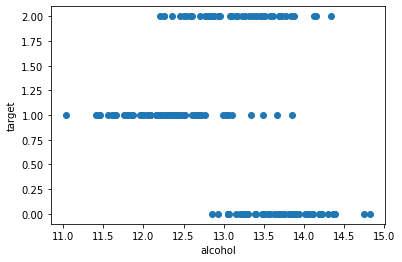

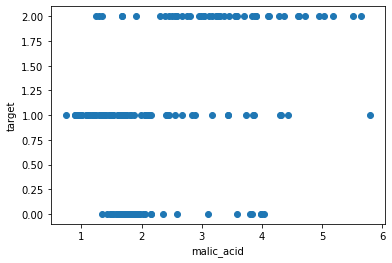

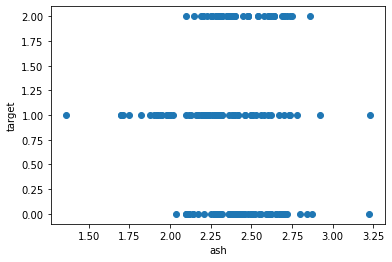

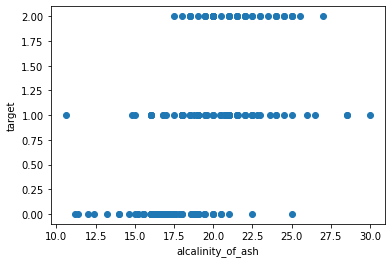

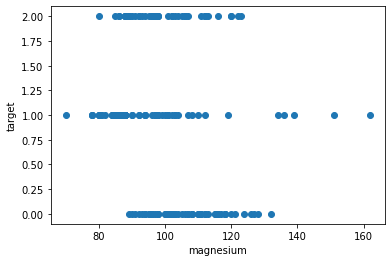

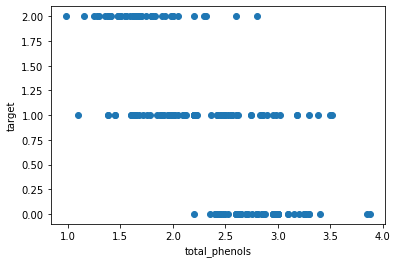

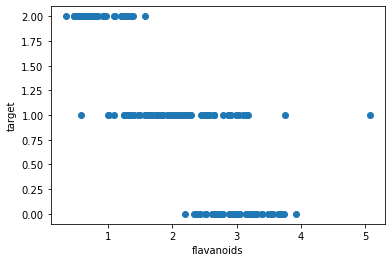

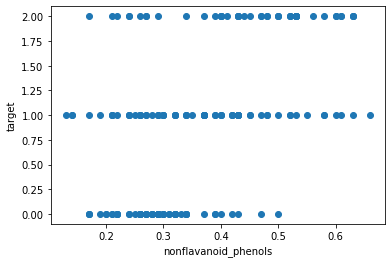

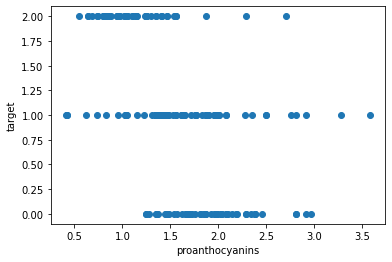

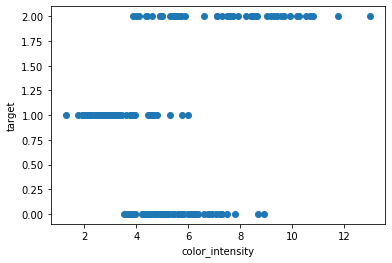

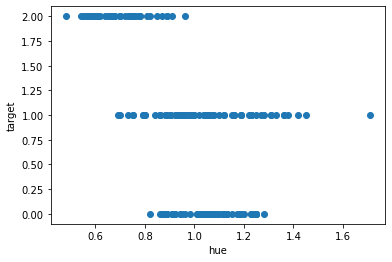

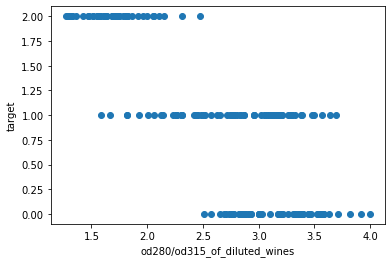

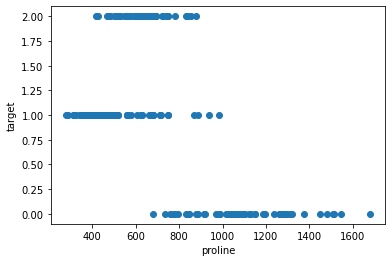

In [6]:
depends_upon = dataSrc.feature_names
for i in depends_upon:
  x = data[i]
  y = data['target']
  plt.xlabel(i)
  plt.ylabel('target')
  plt.scatter(x, y)
  plt.show()

## Using heatmaps
Graphs can give a pretty fair picture about the relationship between the targetted data and the feature. But using a heatmap shows a more accurate picture about the correlation between different features and the target variable.

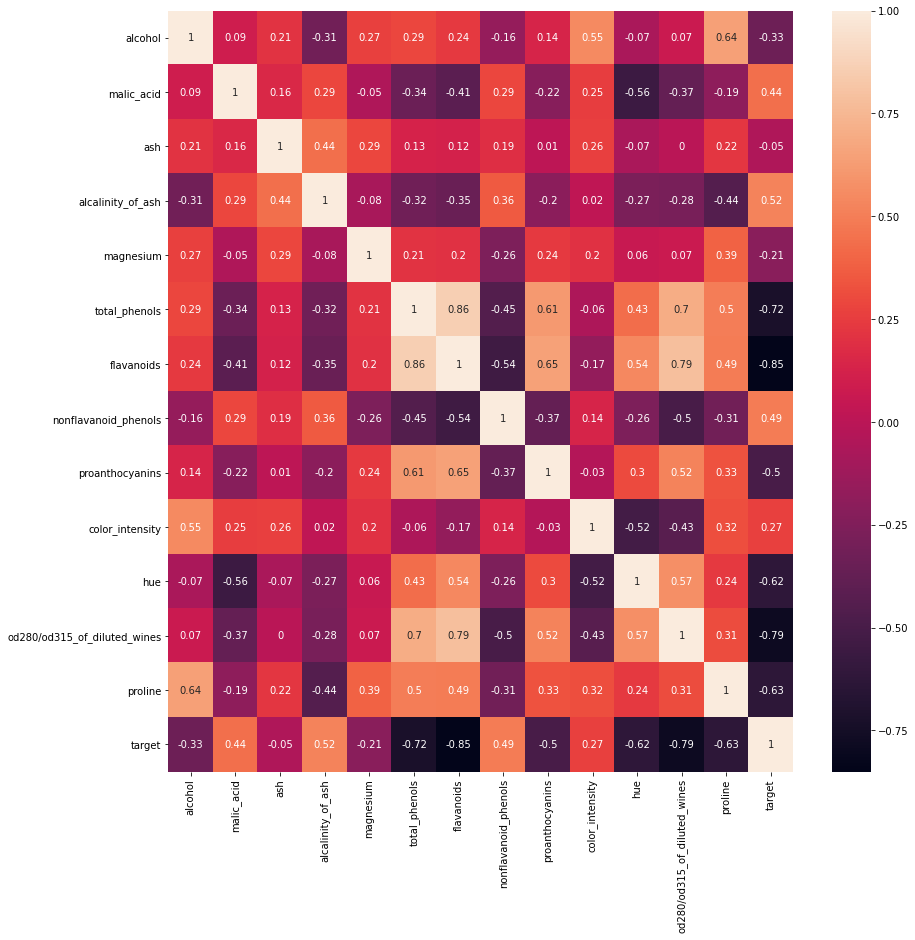

In [7]:
plt.figure(figsize=(14,14))
corr_matrix = data.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

## Conclusion from the graphs and heatmaps
From both, the graphs and the heatmap, we can infer that malic_acid, alcalinity_of_ash, nonflavanoid_phenols, od280/od315_of_diluted_wines, total_phenols, flavanoids, hue, proline could provide us with a better understanding of the data with Regression.

We now shape the X and Y variables we are gonna use.

In [0]:
x = data[['malic_acid', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'total_phenols', 'flavanoids', 'hue', 'proline']]
y = data[['target']]

## Splitting the dataset
We use train_test_split to test our dataset into training and testing variables.

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, random_state=4, test_size=0.3)

We create a logistic regression model. Since the dimensions of our dataset is big, we set the Maximum Iterations value to 2,250 (the default value being 1000).

In [0]:
model = LogisticRegression(max_iter=2250)

We train the Logistic Regression model using the fit method.

In [11]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We make predictions for the X values in the testing dataset and store it in the y_hat variable. Now we can compare the y_hat variable with the y_test variable to compare the accuracy of our model.

In [0]:
y_hat = model.predict(x_test)

# Calculating our model's efficiency
Calculated the efficiency of our model in different ways.

Using the in-built score method we calculate the performance score of our model.

In [13]:
model.score(x_test, y_test)

0.9629629629629629

We calculate the F1 Score of the model using sklearns, f1_score function.

In [14]:
score = f1_score(y_test, y_hat, average='weighted')
print("F1 Score of the model is", score)

F1 Score of the model is 0.9627995642701526


### Plotting a confusion matrix
Visualising the predictions of our model in the form of a confusion matrix to see how well our model performs

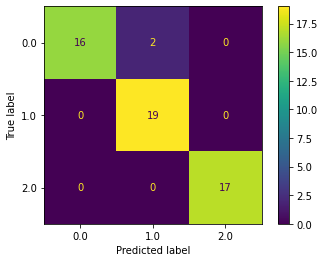

In [15]:
plot_confusion_matrix(model, x_test, y_test)

### Calculating TF, TN, FP, FN

Writing a function to manually calculate the True Positives, False Positives, True Negatives and False Negatives.

In [0]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [17]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.9047619047619048
Recall is 1.0
Specificity is 0.8888888888888888
Accuracy is 0.9459459459459459


## Plotting the malic_acid versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of malic_acid. The red dots are what the model predicted.

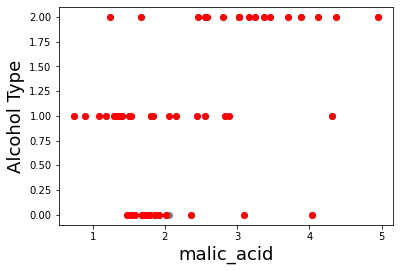

In [18]:
plt.scatter(x_test['malic_acid'], y_test, color='grey')
plt.scatter(x_test['malic_acid'], y_hat, c='red')
plt.xlabel("malic_acid", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the alcalinity_of_ash versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of alcalinity_of_ash. The red dots are what the model predicted.

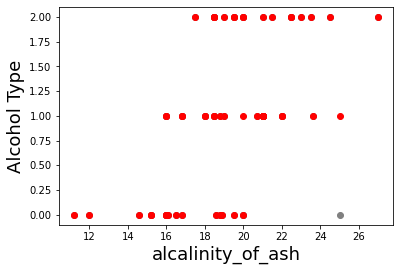

In [19]:
plt.scatter(x_test['alcalinity_of_ash'], y_test, color='grey')
plt.scatter(x_test['alcalinity_of_ash'], y_hat, c='red')
plt.xlabel("alcalinity_of_ash", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the total_phenols versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of total_phenols. The red dots are what the model predicted.

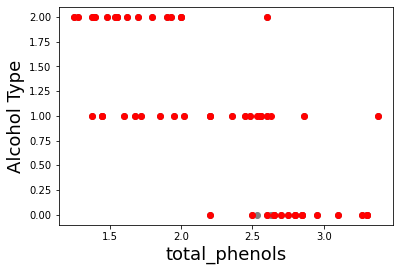

In [20]:
plt.scatter(x_test['total_phenols'], y_test, color='grey')
plt.scatter(x_test['total_phenols'], y_hat, c='red')
plt.xlabel("total_phenols", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the flavanoids versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of flavanoids. The red dots are what the model predicted.

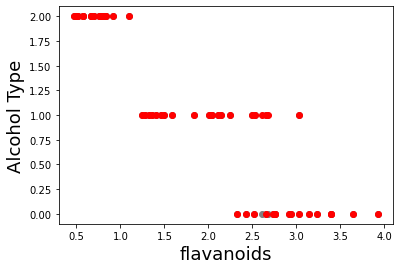

In [21]:
plt.scatter(x_test['flavanoids'], y_test, color='grey')
plt.scatter(x_test['flavanoids'], y_hat, c='red')
plt.xlabel("flavanoids", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the nonflavanoid_phenols versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of nonflavanoid_phenols. The red dots are what the model predicted.

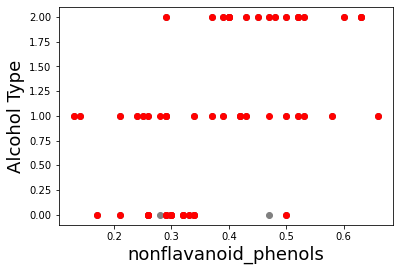

In [22]:
plt.scatter(x_test['nonflavanoid_phenols'], y_test, color='grey')
plt.scatter(x_test['nonflavanoid_phenols'], y_hat, c='red')
plt.xlabel("nonflavanoid_phenols", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the hue versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of hue. The red dots are what the model predicted.

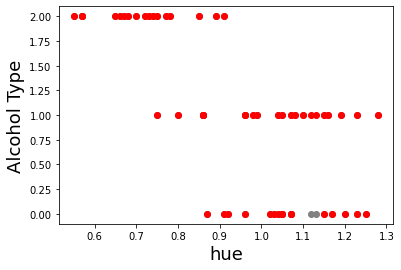

In [23]:
plt.scatter(x_test['hue'], y_test, color='grey')
plt.scatter(x_test['hue'], y_hat, c='red')
plt.xlabel("hue", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the proline versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of proline. The red dots are what the model predicted.

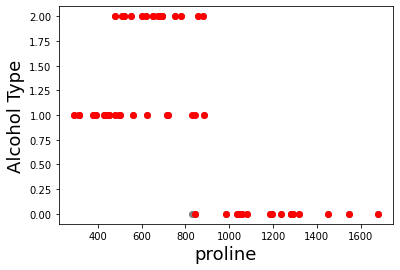

In [24]:
plt.scatter(x_test['proline'], y_test, color='grey')
plt.scatter(x_test['proline'], y_hat, c='red')
plt.xlabel("proline", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

## Plotting the od280/od315_of_diluted_wines versus target class graph
The grey dots highlight the data fed in the testing set for classifying on the basis of od280/od315_of_diluted_wines. The red dots are what the model predicted.

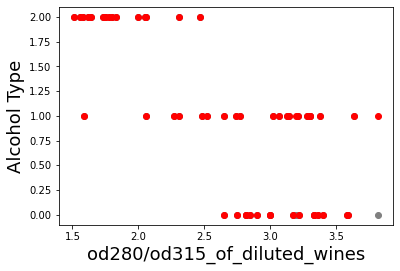

In [25]:
plt.scatter(x_test['od280/od315_of_diluted_wines'], y_test, color='grey')
plt.scatter(x_test['od280/od315_of_diluted_wines'], y_hat, c='red')
plt.xlabel("od280/od315_of_diluted_wines", fontsize=18)
plt.ylabel("Alcohol Type", fontsize=18)
plt.show()

# Conclusion
Learned about how to work with Logistic Regression Models. Displayed the correlation between different features in the dataset using heatmaps and graphs. Also calculated the F1 Score, accuracy, specificity indicating the accuracy of our model. Also, visualised our predictions in the form of a confusion matrix.

The model makes pretty good predictions and has a good accuracy rate.